In [95]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import seaborn as sns





In [6]:
df = pd.read_csv('covid.csv')

In [3]:
df.shape

(14911, 18)

In [9]:
df.head(20)

,Unnamed: 0,_id,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,0,44294,Sporadic,50-59,Malvern,M1B,Institutional,CONFIRMED,2020-03-25,2020-03-27,MALE,RESOLVED,No,No,No,No,No,No
1,1,44295,Sporadic,20-29,Malvern,M1B,Community,CONFIRMED,2020-03-20,2020-03-28,MALE,RESOLVED,No,No,No,Yes,No,No
2,2,44296,Sporadic,60-69,Malvern,M1B,Travel,CONFIRMED,2020-03-04,2020-03-08,FEMALE,RESOLVED,No,No,No,Yes,Yes,Yes
3,3,44297,Outbreak Associated,50-59,Rouge,M1B,N/A - Outbreak associated,CONFIRMED,2020-05-02,2020-05-04,FEMALE,RESOLVED,No,No,No,No,No,No
4,4,44298,Sporadic,30-39,Rouge,M1B,Close contact,CONFIRMED,2020-05-31,2020-06-06,FEMALE,RESOLVED,No,No,No,No,No,No
5,5,44299,Sporadic,20-29,Rouge,M1B,Close contact,CONFIRMED,2020-06-01,2020-06-06,MALE,RESOLVED,No,No,No,No,No,No
6,6,44300,Sporadic,60-69,Rouge,M1B,Community,CONFIRMED,2020-05-22,2020-06-01,MALE,RESOLVED,No,No,No,No,No,No
7,7,44301,Sporadic,30-39,Rouge,M1B,Close contact,PROBABLE,2020-05-26,2020-06-02,MALE,RESOLVED,No,No,No,No,No,No
8,8,44302,Sporadic,30-39,Malvern,M1B,Close contact,CONFIRMED,2020-05-11,2020-05-16,MALE,RESOLVED,No,No,No,No,No,No
9,9,44303,Sporadic,19 and younger,Malvern,M1B,Close contact,PROBABLE,2020-06-06,2020-06-09,MALE,RESOLVED,No,No,No,No,No,No


In [17]:
df.dtypes

Unnamed: 0                 int64
_id                        int64
Outbreak Associated       object
Age Group                 object
Neighbourhood Name        object
FSA                       object
Source of Infection       object
Classification            object
Episode Date              object
Reported Date             object
Client Gender             object
Outcome                   object
Currently Hospitalized    object
Currently in ICU          object
Currently Intubated       object
Ever Hospitalized         object
Ever in ICU               object
Ever Intubated            object
dtype: object

In [6]:
text = df.dtypes[df.dtypes == "object"].index
text

Index(['Outbreak Associated', 'Age Group', 'Neighbourhood Name', 'FSA',
       'Source of Infection', 'Classification', 'Episode Date',
       'Reported Date', 'Client Gender', 'Outcome', 'Currently Hospitalized',
       'Currently in ICU', 'Currently Intubated', 'Ever Hospitalized',
       'Ever in ICU', 'Ever Intubated'],
      dtype='object')

In [8]:
df[text].describe()

,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
count,14911,14879,14298,14344,14911,14911,14911,14811,14911,14911,14911,14911,14911,14911,14911,14911
unique,2,9,140,96,8,2,149,142,5,3,2,2,2,2,2,2
top,Sporadic,50-59,Glenfield-Jane Heights,M9V,N/A - Outbreak associated,CONFIRMED,2020-04-15,2020-05-29,FEMALE,RESOLVED,No,No,No,No,No,No
freq,9333,2354,502,850,5578,13686,292,435,7909,13195,14760,14882,14886,13063,14511,14624


In [19]:
df.describe()

,Unnamed: 0,_id
count,14911.000000,14911.000000
mean,7455.000000,51749.000000
std,4304.579267,4304.579267
min,0.000000,44294.000000
25%,3727.500000,48021.500000
50%,7455.000000,51749.000000
75%,11182.500000,55476.500000
max,14910.000000,59204.000000


In [13]:
df["Unnamed: 0"].describe()

count    14911.000000
mean      7455.000000
std       4304.579267
min          0.000000
25%       3727.500000
50%       7455.000000
75%      11182.500000
max      14910.000000
Name: Unnamed: 0, dtype: float64

### Planning Steps

*Step 1.* Remove unnecessary coloumns (unnamed:0 , _id) \
*Step 2.* Identify coloumns with missing entries (neighbourhood name, age group, fsa, reported date) \
*Step 3* Select method to address missing data. \
    -Age - fill in with mode \
    -Reported date - Fill in with mean time period between episode and report date\
    -Location - delete null rows \
*step 4* Numerate Objects \
*step 5* Plot graphs

In [20]:
del df["Unnamed: 0"]

In [26]:
df.head()

,Unnamed: 0,_id,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,0,44294,Sporadic,50-59,Malvern,M1B,Institutional,CONFIRMED,2020-03-25,2020-03-27,1,2,No,No,No,No,No,No
1,1,44295,Sporadic,20-29,Malvern,M1B,Community,CONFIRMED,2020-03-20,2020-03-28,1,2,No,No,No,Yes,No,No
2,2,44296,Sporadic,60-69,Malvern,M1B,Travel,CONFIRMED,2020-03-04,2020-03-08,0,2,No,No,No,Yes,Yes,Yes
3,3,44297,Outbreak Associated,50-59,Rouge,M1B,N/A - Outbreak associated,CONFIRMED,2020-05-02,2020-05-04,0,2,No,No,No,No,No,No
4,4,44298,Sporadic,30-39,Rouge,M1B,Close contact,CONFIRMED,2020-05-31,2020-06-06,0,2,No,No,No,No,No,No


In [22]:
df["Age Group"].describe()

count     14879
unique        9
top       50-59
freq       2354
Name: Age Group, dtype: object

In [23]:
df.isna().sum()

_id                         0
Outbreak Associated         0
Age Group                  32
Neighbourhood Name        613
FSA                       567
Source of Infection         0
Classification              0
Episode Date                0
Reported Date             100
Client Gender               0
Outcome                     0
Currently Hospitalized      0
Currently in ICU            0
Currently Intubated         0
Ever Hospitalized           0
Ever in ICU                 0
Ever Intubated              0
dtype: int64

In [30]:
df=df.dropna(how='any', subset=['Neighbourhood Name', 'FSA'])
df.isna().sum()





Unnamed: 0                 0
_id                        0
Outbreak Associated        0
Age Group                 24
Neighbourhood Name         0
FSA                        0
Source of Infection        0
Classification             0
Episode Date               0
Reported Date             98
Client Gender              0
Outcome                    0
Currently Hospitalized     0
Currently in ICU           0
Currently Intubated        0
Ever Hospitalized          0
Ever in ICU                0
Ever Intubated             0
dtype: int64

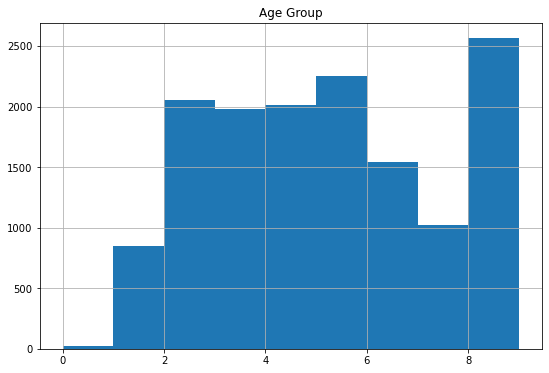

In [83]:
le = LabelEncoder()
df['Client Gender'] = le.fit_transform(df['Client Gender'])
df['Client Gender'].describe()
df['Client Gender'].astype('int64')
df['Client Gender']= df['Client Gender'].astype('category')


df['Outcome'] = le.fit_transform(df['Outcome'])
df.head()


df['Age Group'] = df['Age Group'].astype('category')
df['Age Group'].dtypes
df.dtypes
df['Age Group'] = df['Age Group'].cat.codes





df.hist(column='Age Group', figsize=(9,6), bins=9)

df[['Age Group']] = df[['Age Group']].apply(pd.to_numeric)




In [75]:
df['Age Group'].isna().sum()

0

In [76]:
df.isna().sum()

Unnamed: 0                 0
_id                        0
Outbreak Associated        0
Age Group                  0
Neighbourhood Name         0
FSA                        0
Source of Infection        0
Classification             0
Episode Date               0
Reported Date             98
Client Gender              0
Outcome                    0
Currently Hospitalized     0
Currently in ICU           0
Currently Intubated        0
Ever Hospitalized          0
Ever in ICU                0
Ever Intubated             0
dtype: int64

In [84]:
df.dtypes

Unnamed: 0                   int64
_id                          int64
Outbreak Associated         object
Age Group                     int8
Neighbourhood Name          object
FSA                         object
Source of Infection         object
Classification              object
Episode Date                object
Reported Date               object
Client Gender             category
Outcome                      int64
Currently Hospitalized      object
Currently in ICU            object
Currently Intubated         object
Ever Hospitalized           object
Ever in ICU                 object
Ever Intubated              object
dtype: object

In [88]:
df.isna().sum()

Unnamed: 0                 0
_id                        0
Outbreak Associated        0
Age Group                  0
Neighbourhood Name         0
FSA                        0
Source of Infection        0
Classification             0
Episode Date               0
Reported Date             98
Client Gender              0
Outcome                    0
Currently Hospitalized     0
Currently in ICU           0
Currently Intubated        0
Ever Hospitalized          0
Ever in ICU                0
Ever Intubated             0
dtype: int64

In [89]:
df['Episode Date'].dtype

dtype('O')

In [174]:
trialep = pd.to_datetime(df['Episode Date'].astype(str), format='%Y/%m/%d')
trialrp2 =pd.to_datetime(df['Reported Date'].astype(str), format='%Y/%m/%d')
timedif2 = np.array(['trialrp2' 'trialep'])


** Author's Note ** \
I attempted to take the difference between the corresponding reported and episode date for all the columns, then average that number in order to have a value to add to the missing reported date values but I kept getting back a null value. Hopefully I can get guidance on how to do that in the future.


In [169]:
total = 0
for i in range(len(timedif2)-1):  
    total += abs((trialep(*[int(d) for d in trialep[i]]) - trialrp(*[int(d) for d in trialrp[i+1]])).days)
print(total)

0


## Graphical Analysis Segment

### Hospitalization Analysis

* Most cases were not hospitalized
* The currently hospitalized patients are elderly (age 60+)
* More women were infected than men.

In [187]:
df['Currently Hospitalized'].value_counts()


No     14148
Yes      150
Name: Currently Hospitalized, dtype: int64

<AxesSubplot:xlabel='Currently Hospitalized', ylabel='Age Group'>

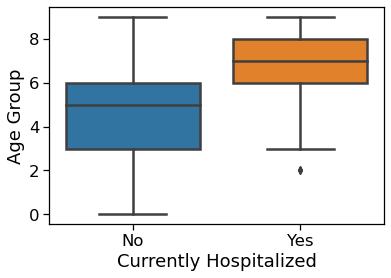

In [306]:
sns.boxplot(x = 'Currently Hospitalized', y = 'Age Group', data = df)

In [189]:
df['Episode Date'].value_counts()

2020-04-15    286
2020-04-14    262
2020-04-17    262
2020-04-13    258
2020-04-18    239
             ... 
2020-01-21      1
2020-01-22      1
2020-02-21      1
2020-02-07      1
2020-02-05      1
Name: Episode Date, Length: 149, dtype: int64

In [196]:
df.dtypes

Unnamed: 0                   int64
_id                          int64
Outbreak Associated         object
Age Group                     int8
Neighbourhood Name          object
FSA                         object
Source of Infection         object
Classification              object
Episode Date                object
Reported Date               object
Client Gender             category
Outcome                      int64
Currently Hospitalized      object
Currently in ICU            object
Currently Intubated         object
Ever Hospitalized           object
Ever in ICU                 object
Ever Intubated              object
dtype: object

In [197]:
df['Age Group'].value_counts()

5    2255
2    2054
4    2011
3    1981
6    1540
8    1483
9    1081
7    1019
1     850
0      24
Name: Age Group, dtype: int64

In [201]:
bdf.dtypes

Unnamed: 0                   int64
_id                          int64
Outbreak Associated         object
Age Group                   object
Neighbourhood Name          object
FSA                         object
Source of Infection         object
Classification              object
Episode Date                object
Reported Date               object
Client Gender             category
Outcome                      int64
Currently Hospitalized      object
Currently in ICU            object
Currently Intubated         object
Ever Hospitalized           object
Ever in ICU                 object
Ever Intubated              object
dtype: object

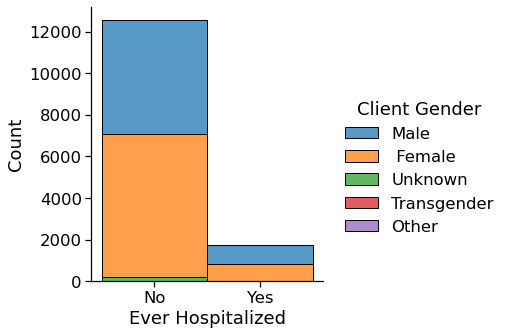

In [304]:
cleanup = { 'Age Group': { 5:"50-59" , 2: "20-29", 4: "30-39", 3: "40-49" , 6:"60-69", 8:"80-89", 9: "90+", 7:"70-79", 1:"19 and younger"} ,
             'Client Gender' : {0: " Female", 1: "Male", 4: "Unknown", 3 : "Transgender", 2 : "Other"} , 
              'Outcome': {2: "Resolved", 1: "Fatal", 0: "Active"} }
bdf= df.replace(cleanup)
sns.displot(data=bdf, x="Ever Hospitalized", hue="Client Gender", multiple="stack") #keep this opne

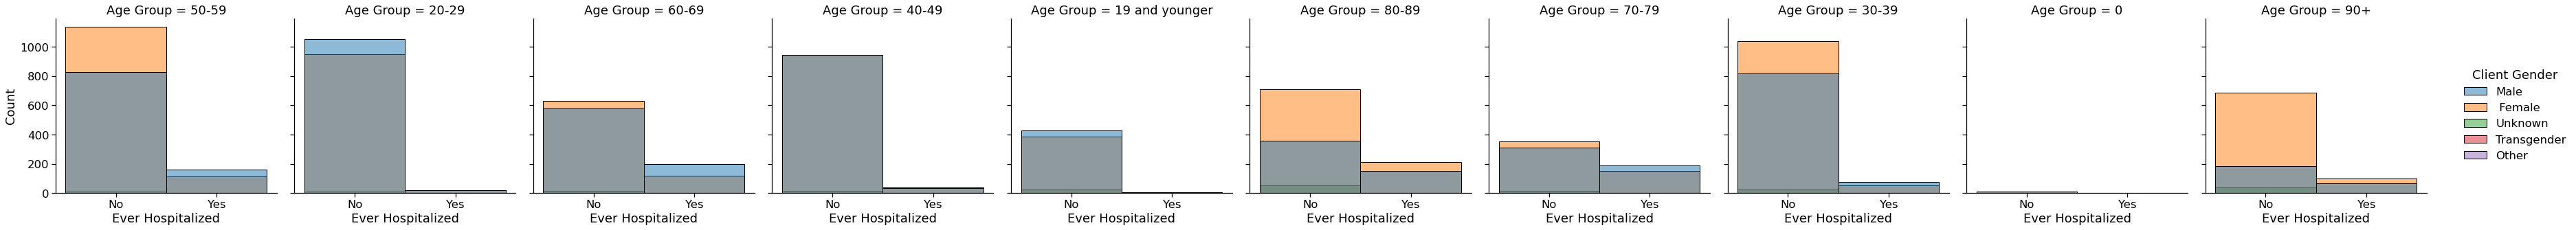

In [293]:
cleanup = { 'Age Group': { 5:"50-59" , 2: "20-29", 4: "30-39", 3: "40-49" , 6:"60-69", 8:"80-89", 9: "90+", 7:"70-79", 1:"19 and younger"} ,
             'Client Gender' : {0: " Female", 1: "Male", 4: "Unknown", 3 : "Transgender", 2 : "Other"} , 
              'Outcome': {2: "Resolved", 1: "Fatal", 0: "Active"} }
bdf= df.replace(cleanup)
sns.displot(data=bdf, x="Ever Hospitalized", hue="Client Gender", col="Age Group") #resize but keep, change age group to porper label

## Outbreak and Neighbourhood Analysis 
* A little more than 50% of the neighbourhoods with cases were as a result of sporadic outbreaks ( cases that spread were irregular and infrequent).
* These sporadic outbreaks are majority spread by close contact.
* The Neighbourhood that had the most cases was Glenfield-Jane Heights.
* The neighbourhood with the least amount of cases was Danforth (with 13 cases).

In [217]:
df['Outbreak Associated'].value_counts()
df["Neighbourhood Name"].mode()

0    Glenfield-Jane Heights
dtype: object

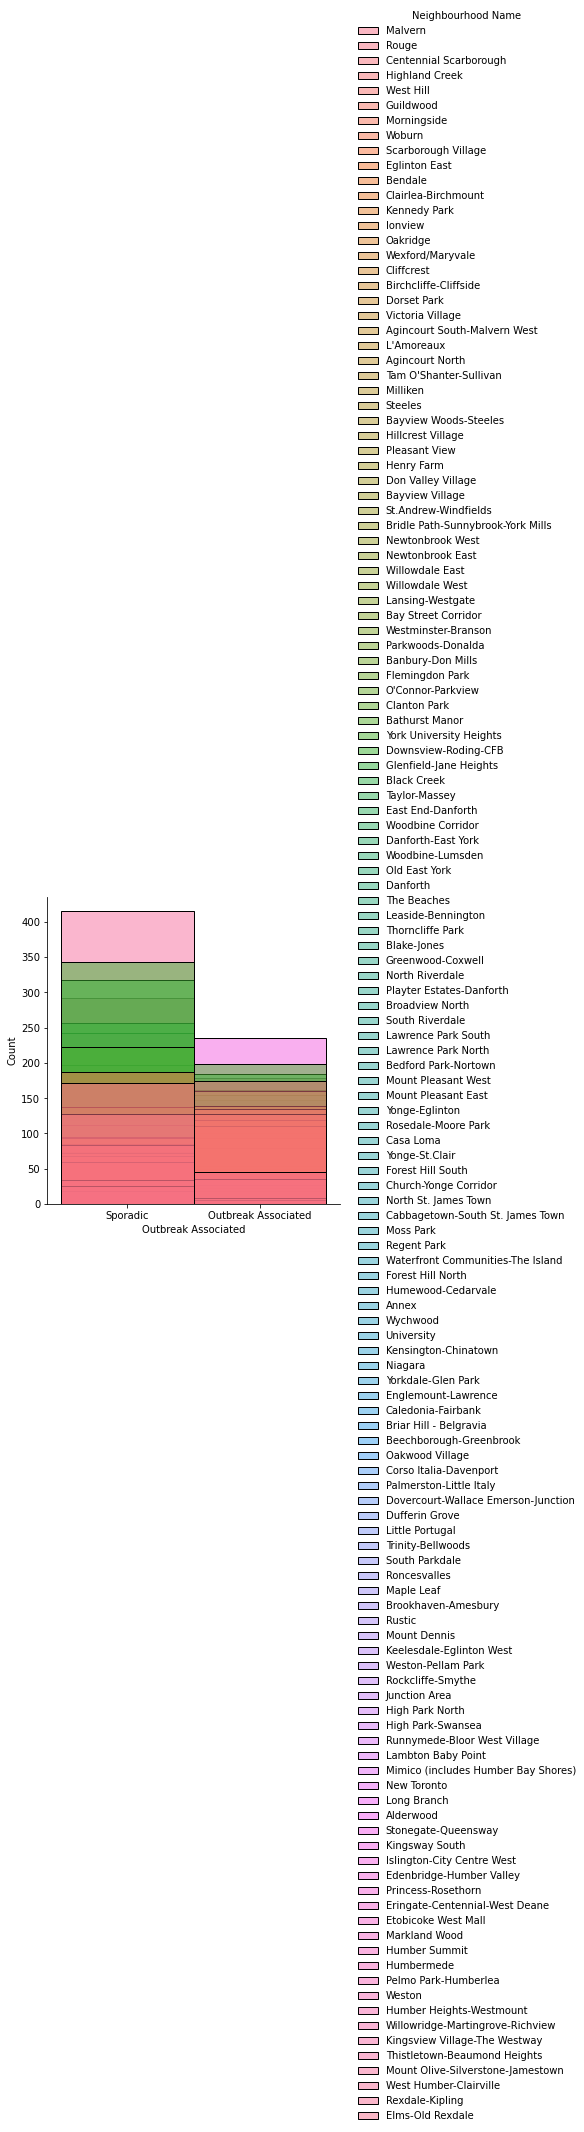

In [223]:
sns.displot(data=df, x="Outbreak Associated", hue="Neighbourhood Name"  )

In [224]:
df['Source of Infection'].value_counts()

N/A - Outbreak associated    5298
Close contact                4818
Community                    1937
Healthcare                    870
Travel                        469
Unknown/Missing               343
Institutional                 287
Pending                       276
Name: Source of Infection, dtype: int64

<ipython-input-247-9d8f6bb994de>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


<Figure size 1080x720 with 0 Axes>

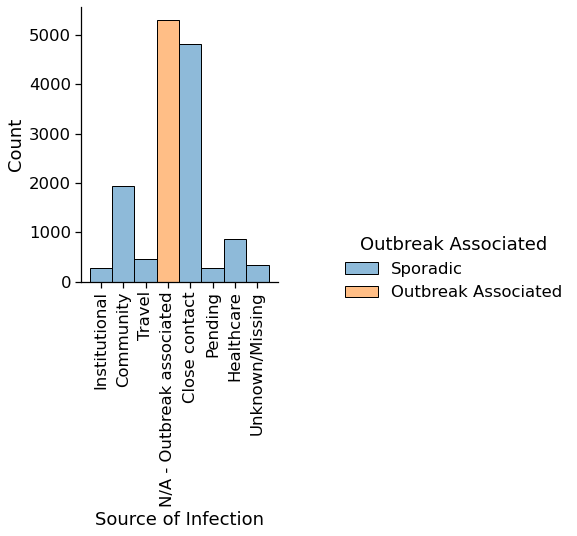

In [247]:
plt.figure(figsize=(15,10))
chart =sns.displot(data=df, x="Source of Infection", hue="Outbreak Associated"  )

for axes in chart.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


In [249]:
df['Neighbourhood Name'].value_counts()


Glenfield-Jane Heights               502
Mount Olive-Silverstone-Jamestown    472
West Humber-Clairville               471
Downsview-Roding-CFB                 443
York University Heights              421
                                    ... 
The Beaches                           16
Lambton Baby Point                    16
Yonge-Eglinton                        14
Blake-Jones                           14
Danforth                              13
Name: Neighbourhood Name, Length: 140, dtype: int64

## Reported Time Analysis 
* The calculated average day between Reported and Episode Date was 6.4 days.
* May 29, 2020 was the day with the highest reported cases.
* There was a downward trend in number of cases as time progressed.

In [254]:
df['Reported Date'].value_counts()

2020-05-29    417
2020-04-17    347
2020-04-20    282
2020-04-16    275
2020-04-13    263
             ... 
2020-03-03      1
2020-03-06      1
2020-02-27      1
2020-01-23      1
2020-02-21      1
Name: Reported Date, Length: 142, dtype: int64

In [255]:
df["Episode Date"].value_counts()

2020-04-15    286
2020-04-14    262
2020-04-17    262
2020-04-13    258
2020-04-18    239
             ... 
2020-01-21      1
2020-01-22      1
2020-02-21      1
2020-02-07      1
2020-02-05      1
Name: Episode Date, Length: 149, dtype: int64

Authors note \
Since the above trial to take an average length between reported date and the calculated episode date failed, I'll find the average time for the first 5 unique id's.


In [269]:
df.head()

,Unnamed: 0,_id,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,0,44294,Sporadic,5,Malvern,M1B,Institutional,CONFIRMED,2020-03-25,2020-03-27,1,2,No,No,No,No,No,No
1,1,44295,Sporadic,2,Malvern,M1B,Community,CONFIRMED,2020-03-20,2020-03-28,1,2,No,No,No,Yes,No,No
2,2,44296,Sporadic,6,Malvern,M1B,Travel,CONFIRMED,2020-03-04,2020-03-08,0,2,No,No,No,Yes,Yes,Yes
3,3,44297,Outbreak Associated,5,Rouge,M1B,N/A - Outbreak associated,CONFIRMED,2020-05-02,2020-05-04,0,2,No,No,No,No,No,No
4,4,44298,Sporadic,3,Rouge,M1B,Close contact,CONFIRMED,2020-05-31,2020-06-06,0,2,No,No,No,No,No,No


0:3/25 - 3/27
1:3/20 - 3/28
2:3/4 - 3/8
3:5/2 - 5/4
4:5/31 - 6/6

In [273]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

days_between("2020-3-25", "2020-3-27") 

2

In [274]:
days_between("2020-5-21", "2020-6-6")

16

In [279]:
timedif = 2 + 8 + 4 + 2 + 16
timedif/5

6.4

<AxesSubplot:xlabel='Episode Date', ylabel='count'>

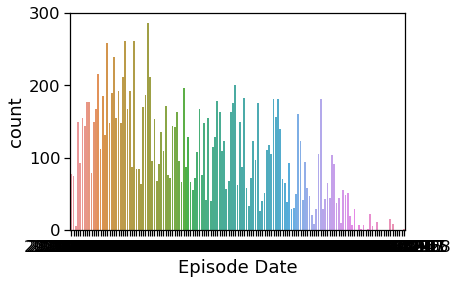

In [280]:
sns.countplot(x = 'Episode Date', data = df)

In [281]:
df['Reported Date'].mode()

0    2020-05-29
dtype: object

## Form of Transmission Analysis
* Age groups from 60's to 90+ mostly contracted the virus from an outbreak. Perhaps this is because the elderly in Canada. reside in retirement homes that were prone to an outbreak.
* People aged 19 and up, tended to be infected through close contact than any other form of transmission.
* There are low levels of travel related outbreaks among all genders.
* Women had higher rates of close contact related transmission than men.




<ipython-input-285-a29ba7c6c93b>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


<Figure size 1440x1080 with 0 Axes>

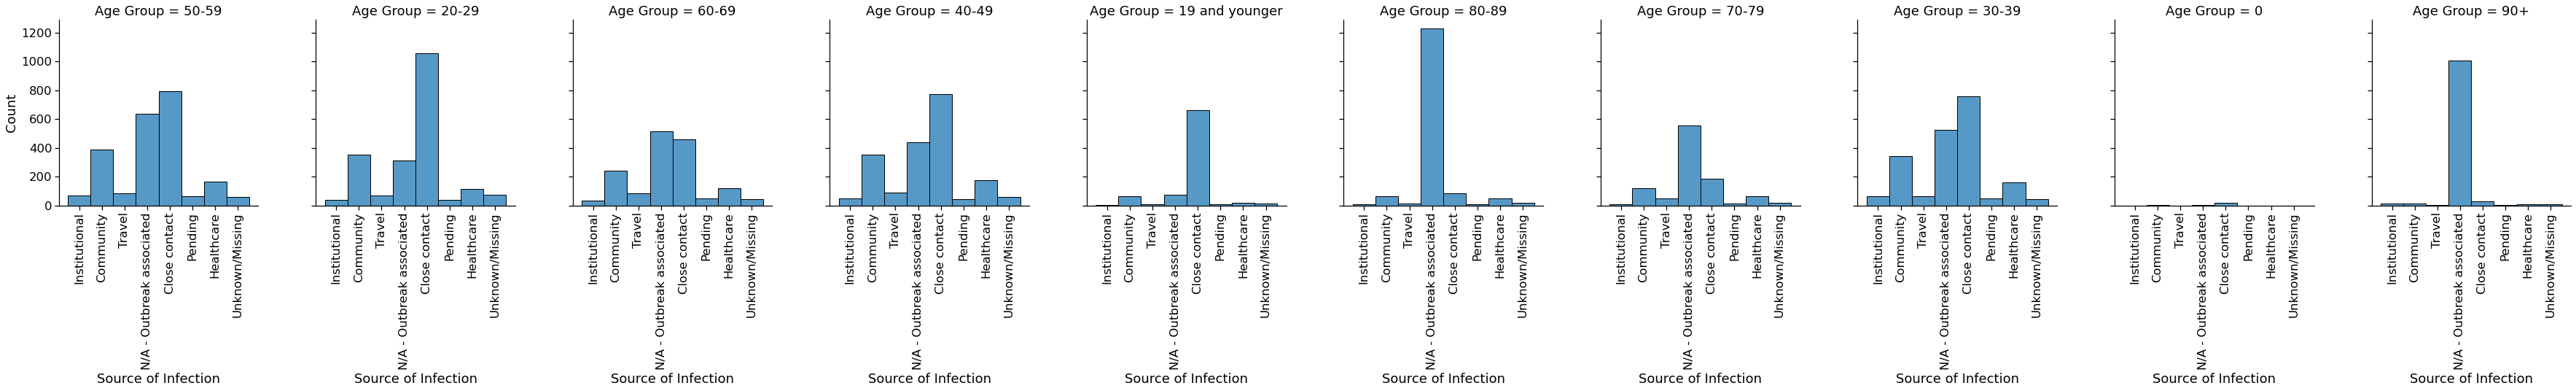

In [285]:
plt.figure(figsize=(20,15))
chart =sns.displot(data=bdf, x="Source of Infection", col ="Age Group"  )

for axes in chart.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

<ipython-input-292-d6dfae5ad8c5>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


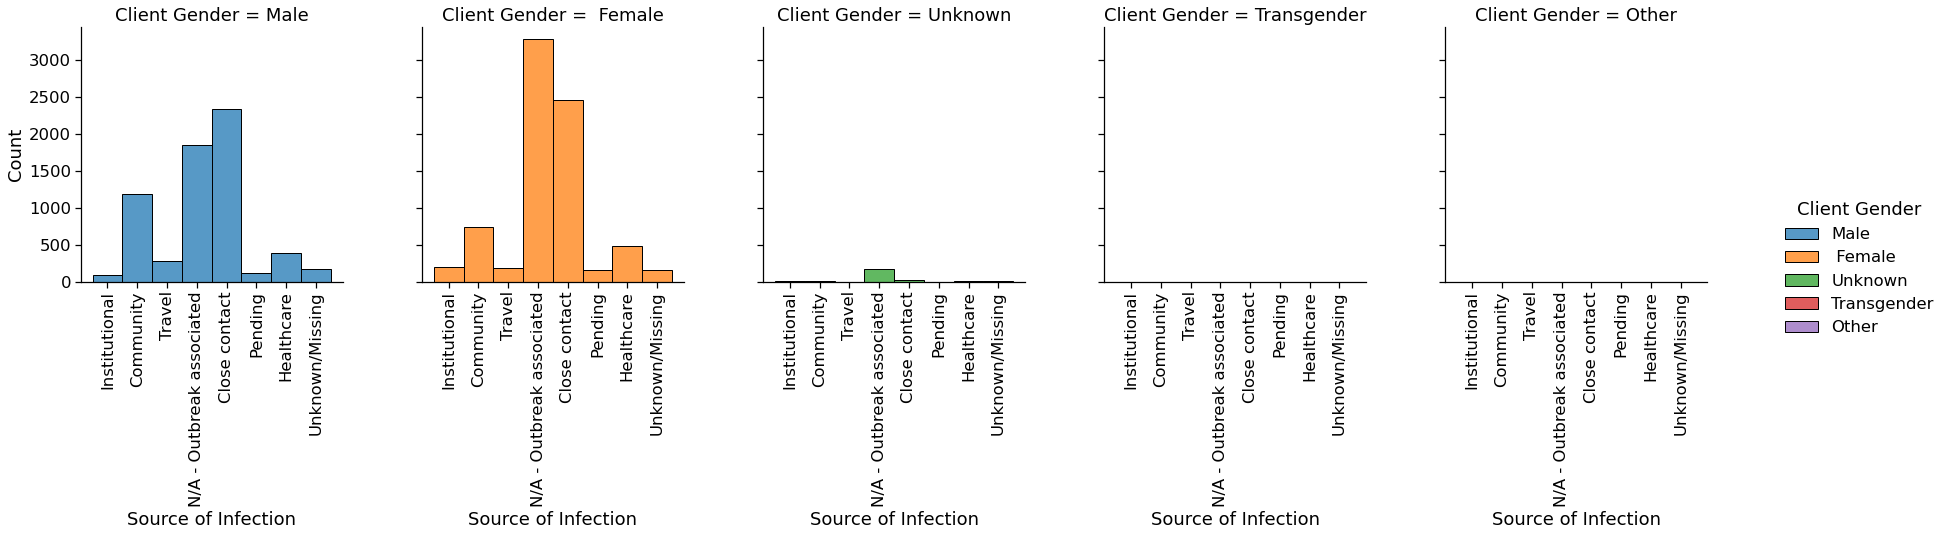

In [292]:
chart2 = sns.displot(data=bdf, x="Source of Infection", hue="Client Gender", col = "Client Gender")
for axes in chart2.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

## Independent Analysis
* Majority of the cases recorded at this time were resolved (90%), perhaps because of the level of healthcare available in Canada
* Similar to the analysis above, of the cases that were resolved, only a few (1%) were intubated before they recovered.
* People aged 19 and younger were the least likely to be hospitalized, and people aged 60-69 were the most hospitalized.


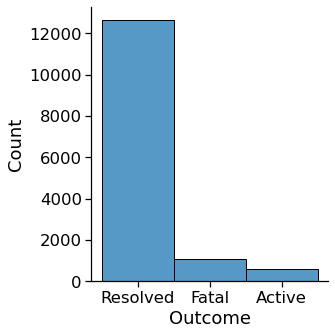

In [296]:
sns.displot(data=bdf, x="Outcome"  )

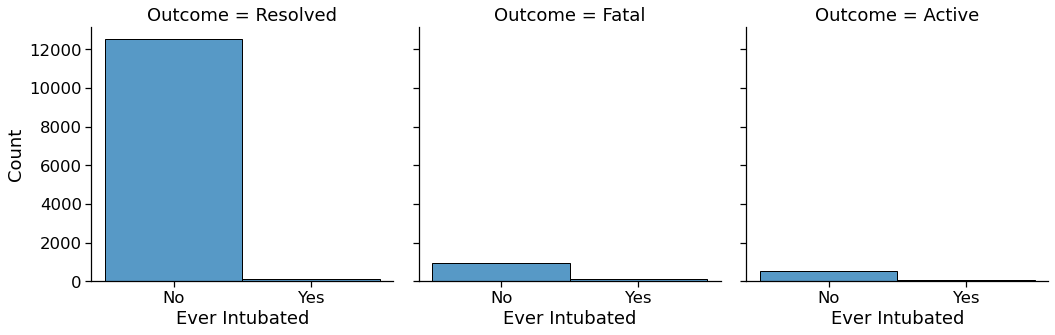

In [299]:
sns.displot(data=bdf, x ="Ever Intubated", col = "Outcome")

<Figure size 7200x3600 with 0 Axes>

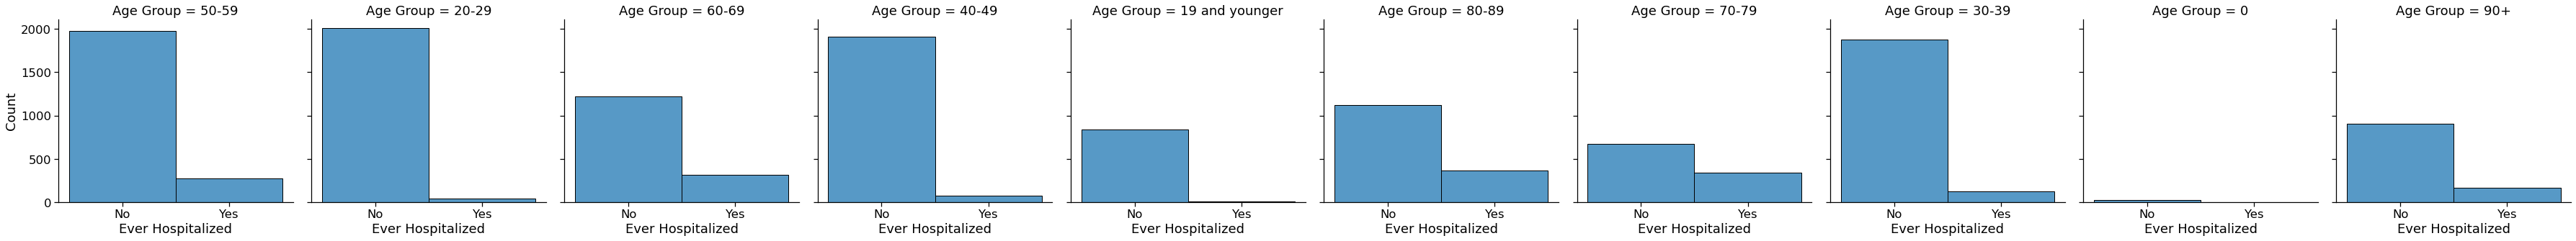

In [303]:
plt.figure(figsize=(100,50))
sns.displot(data=bdf, x = "Ever Hospitalized", col =  "Age Group")